In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from IPython.display import Markdown, display

from os.path import join

from scipy.stats import normaltest

import numpy as np

from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")
sns.set_palette("viridis")

In [143]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(join(data_root, "lifesat", "lifesat.csv"))

In [144]:
lifesat.sort_values(by="Life satisfaction", ascending=False)

,Country,GDP per capita (USD),Life satisfaction
25,Denmark,55938.212809,7.6
17,Finland,47260.800458,7.6
23,Iceland,52279.728851,7.5
24,Netherlands,54209.563836,7.4
16,Canada,45856.625626,7.4
15,New Zealand,42404.393738,7.3
20,Sweden,50683.323510,7.3
19,Australia,48697.837028,7.3
11,Israel,38341.307570,7.2
22,Austria,51935.603862,7.1


In [145]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

X.shape, y.shape

((27, 1), (27, 1))

In [146]:
lifesat.describe()

,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


In [147]:
xmin, xmax = 23500, 62500
ymin, ymax = 4, 9

markdown = f"""
These are the limits in the axis we are going to use:

$$
xmin, \ xmax = {xmin}, \ {xmax}
$$

$$
ymin, \ ymax = {ymin}, \ {ymax}
$$
"""

display(Markdown(markdown))


These are the limits in the axis we are going to use:

$$
xmin, \ xmax = 23500, \ 62500
$$

$$
ymin, \ ymax = 4, \ 9
$$


I want to know if *gdp per capita* and *life satisfaction* follow a normal distribution to compute the correlation between them.

The compute of the corr only makes sense if features follow a Gaussian distribution. We can know if features
follow a Gaussian distribution plotting them (and see if they follow a normal distribution) or with statistical tests.

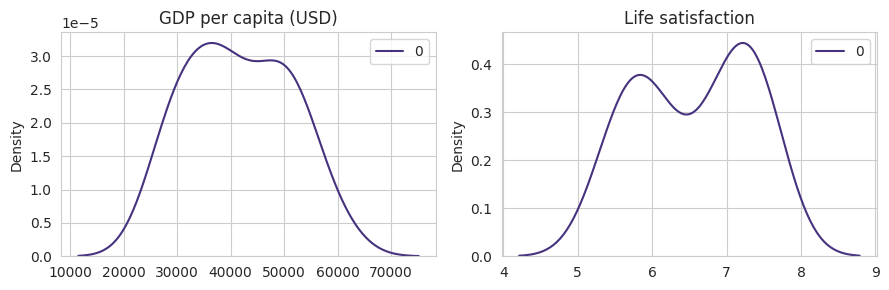

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.kdeplot(X, ax=axes[0])
axes[0].set_title("GDP per capita (USD)")

sns.kdeplot(y, ax=axes[1])
axes[1].set_title("Life satisfaction")

plt.tight_layout()
plt.show()

 $H0$ also known as null hypothesis of `normaltest` is based on the asumption that it follows a normal form. A typical value use
to be sure that the null hypothesis is false is when the percentil is smaller than 0.05, i.e., $p < 0.05$.

In [149]:
normaltest(X)

NormaltestResult(statistic=array([3.26038932]), pvalue=array([0.19589144]))

In [150]:
normaltest(y)

NormaltestResult(statistic=array([14.71794254]), pvalue=array([0.00063685]))

From both, the visual and normal test we can conclude that only *gdp per capita* follows a normal distribution. From this information
we know that probably a linear model is not the best aprouch to make generalitations. Yet the linear correlation, points out that there is a hight linear relation between the independent and dependent variable.

In [151]:
corr = lifesat[["GDP per capita (USD)", "Life satisfaction"]].corr()
corr

,GDP per capita (USD),Life satisfaction
GDP per capita (USD),1.000000,0.852796
Life satisfaction,0.852796,1.000000


We can see a linear trend here. So we can model this problem with a *linear model*.

$Life \ satisfaction = \theta_{0} + \theta_{1} * GDP$

In [152]:
def life_satisfaction(x, t0, t1):
    return t0 + t1 * x

In [153]:
model = LinearRegression()
model.fit(X, y)

t0 = round(model.intercept_[0], 3)
t1 = model.coef_[0][0]

t0, t1

(3.749, 6.778899694341222e-05)

In [154]:
markdown = f"""
The linear equation that minimizes the error in the hole dataset is the follow:

$Life \ satisfaction = {t0} + {t1} * GDP$
"""

display(Markdown(markdown))


The linear equation that minimizes the error in the hole dataset is the follow:

$Life \ satisfaction = 3.749 + 6.778899694341222e-05 * GDP$


In [155]:
yhat = life_satisfaction(X, t0, t1)
yhat[:5]

array([[5.542452  ],
       [5.59876401],
       [5.67318985],
       [5.77809374],
       [5.85098552]])

In [156]:
yhat_m = model.predict(X)
yhat_m[:5]

array([[5.54250143],
       [5.59881344],
       [5.67323928],
       [5.77814317],
       [5.85103495]])

The values predicted by the model and the function `life_satisfaction`
are very similar, as you can appreciate it by the compute of the median error using the Manhattan distance.

$$
\frac {{\sum_{i=0}^{i=n}} \mid yhat_i - yhat\_m_i \mid} {n}
$$

In [157]:
err = np.abs(np.sum((yhat - yhat_m))) / len(yhat)
err

4.942737690907909e-05

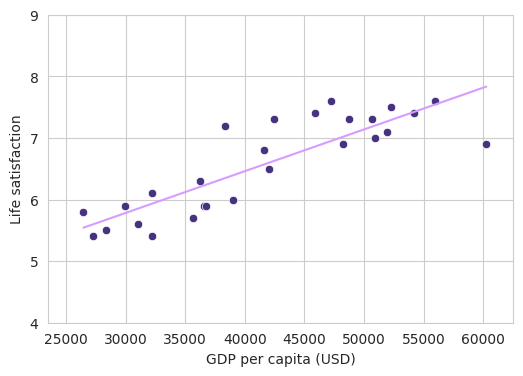

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(x=X.ravel(), y=yhat.ravel(), color="#d69cff")
sns.scatterplot(x=X.ravel(), y=y.ravel())

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_xlabel("GDP per capita (USD)")
ax.set_ylabel("Life satisfaction")


plt.show()

As you probably noticed, this model is kinda useless. It is cool to explain maths but we make no prediction on unseen data. So lets simulate that we have two dataset, one for training the model and one for actual testing the model and lets see its performance.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21, 1), (6, 1), (21, 1), (6, 1))

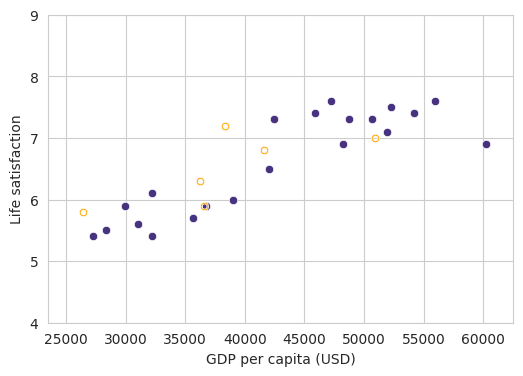

In [160]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.scatterplot(x=X_train.ravel(), y=y_train.ravel())
sns.scatterplot(x=X_test.ravel(), y=y_test.ravel(), color="orange", marker="$\circ$")

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_xlabel("GDP per capita (USD)")
ax.set_ylabel("Life satisfaction")

plt.show()

In [161]:
model = LinearRegression()
model.fit(X_train, y_train)

t0 = round(model.intercept_[0], 3)
t1 = model.coef_[0][0]

t0, t1

(3.533, 7.18650303768337e-05)

In [162]:
markdown = f"""
The linear equation that minimizes the error in the train dataset is the follow:

$Life \ satisfaction = {t0} + {t1} * GDP$
"""

display(Markdown(markdown))


The linear equation that minimizes the error in the train dataset is the follow:

$Life \ satisfaction = 3.533 + 7.18650303768337e-05 * GDP$


In [163]:
yhat_train = model.predict(X_train)
yhat_train[:5]

array([[6.8281986 ],
       [6.92910967],
       [6.33488274],
       [7.42848276],
       [5.49369788]])

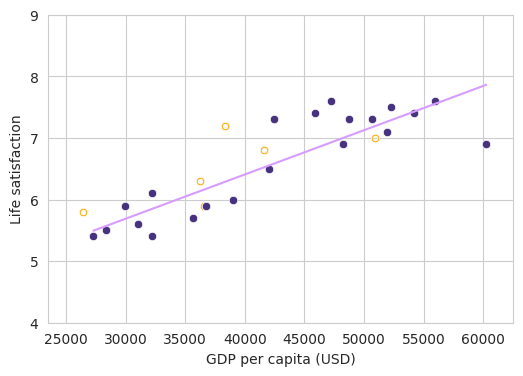

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.scatterplot(x=X_test.ravel(), y=y_test.ravel(), color="orange", marker="$\circ$")
sns.scatterplot(x=X_train.ravel(), y=y_train.ravel())
sns.lineplot(x=X_train.ravel(), y=yhat_train.ravel(), color="#d69cff")

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_xlabel("GDP per capita (USD)")
ax.set_ylabel("Life satisfaction")

plt.show()

In [165]:
yhat_test = model.predict(X_test)
yhat_test[:5]

array([[6.13533505],
       [6.52424572],
       [6.15921518],
       [7.19224761],
       [5.43399993]])

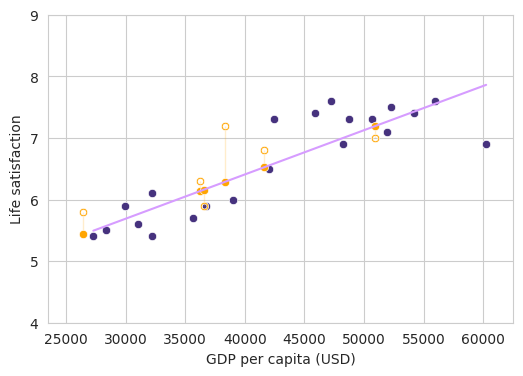

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(x=X_train.ravel(), y=yhat_train.ravel(), color="#d69cff")
sns.scatterplot(x=X_train.ravel(), y=y_train.ravel())

for i, x in enumerate(y_test):
    stack_y = np.vstack((x, yhat_test[i]))
    stack_x = np.repeat(X_test[i], len(stack_y))

    sns.lineplot(x=stack_x.ravel(), y=stack_y.ravel(), color="orange")

sns.scatterplot(x=X_test.ravel(), y=y_test.ravel(), color="orange", marker="$\circ$")
sns.scatterplot(x=X_test.ravel(), y=yhat_test.ravel(), color="orange")


ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_xlabel("GDP per capita (USD)")
ax.set_ylabel("Life satisfaction")

plt.show()

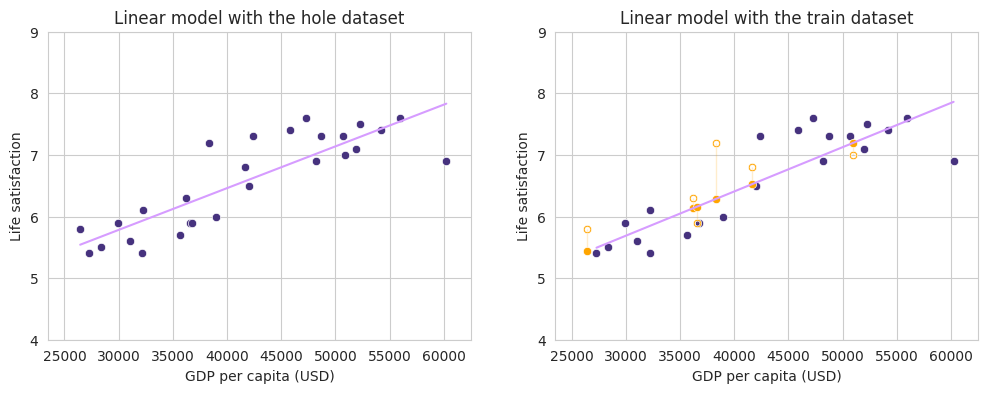

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x=X.ravel(), y=y.ravel(), ax=axes[0])
sns.lineplot(x=X.ravel(), y=yhat.ravel(), color="#d69cff", ax=axes[0])

sns.lineplot(x=X_train.ravel(), y=yhat_train.ravel(), color="#d69cff", ax=axes[1])
sns.scatterplot(x=X_train.ravel(), y=y_train.ravel(), ax=axes[1])

for i, x in enumerate(y_test):
    stack_y = np.vstack((x, yhat_test[i]))
    stack_x = np.repeat(X_test[i], len(stack_y))
    sns.lineplot(x=stack_x.ravel(), y=stack_y.ravel(), color="orange", ax=axes[1])

sns.scatterplot(x=X_test.ravel(), y=y_test.ravel(), color="orange", marker="$\circ$")
sns.scatterplot(x=X_test.ravel(), y=yhat_test.ravel(), color="orange", ax=axes[1])

for ax in axes:
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_xlabel("GDP per capita (USD)")
    ax.set_ylabel("Life satisfaction")

axes[0].set_title("Linear model with the hole dataset")
axes[1].set_title("Linear model with train and test dataset")

plt.show()

As a conclusion, this is a toy modeling example. We have very few data examples to model the problem, yet, we got two different models. You can notice the difference if you look closer at the privious graphic.